### 1. 목표 설정

1. 보스턴 집값 데이터를 이용하여 회기분석 진행
2. 특성곲을 이용하여 새로운 특성 만들기
3. 규제 모델을 이용하여 모델의 복잡도 제어

### 2. CSV 파일 불러오기

- csv파일 불러오기 (보스턴 주택 데이터)

In [1]:
# 필요한 라이브러리

import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
# 데이터 불러오기

boston = pd.read_csv('./data/boston_housing.csv')

In [3]:
boston.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# 필요없는 Unnamed 컬럼 삭제

boston.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


**결측치 없음**

**특성 정보 확인**

- CRIM : 범죄율
- INDUS : 비소매 상업지역의 면적 비율 (-> 도매상업지역의 면적)
- NOX : 대기 중 일산화질소의 농도
- RM : 주택당 방의 개수
- LSTAT : 인구 중 하위 계층의 비율
- B : 인구 중 흑인 비율
- PTRATIO : 학생, 교사 비율
- ZN : 25,000 평방 피트를 초과한 거주지역의 비율
- CHAS : 찰스강의 경게에 위치한 경우는 1, 아닌 경우는 0
- AGE : 1940년 이전에 지어진 주택의 비율
- DIS : 직업센터의 거리
- TAX : 재산세율

**종속변수 확인**

- MEDV : 주택 가격 (집값)

### 3. 데이터 전처리

- 결측치는 없다
- 보스턴 주택 데이터는 학습용으로 제공된 데이터라 전처리 필요 없음 (데이터 깔끔함)

### 4. 탐색적 데이터 분석
**생략**

### 5. 모델링

1. 데이터 분리 (X_train, X_test, y_train, y_test)
2. 모델 선정 및 학습 / 평가 / 예측

In [7]:
# 데이터 분리
# step.1 : 데이터를 분리하기 위한 모듈
from sklearn.model_selection import train_test_split

# step.2 : 데이터를 분리 (y (정답 데이터는 MEDV 컬럼))
# 현재 데이터 상태부터 확인 후 문제와 정답 train, test 모두 한곳에 있는 데이터
# 문제와 정답을 분할 한 후 모듈을 실행
X = boston.drop("MEDV", axis=1)
y = boston["MEDV"]

# train_test_split 모듈 실행
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=8)


# step.3 : 데이터 분할 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [8]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

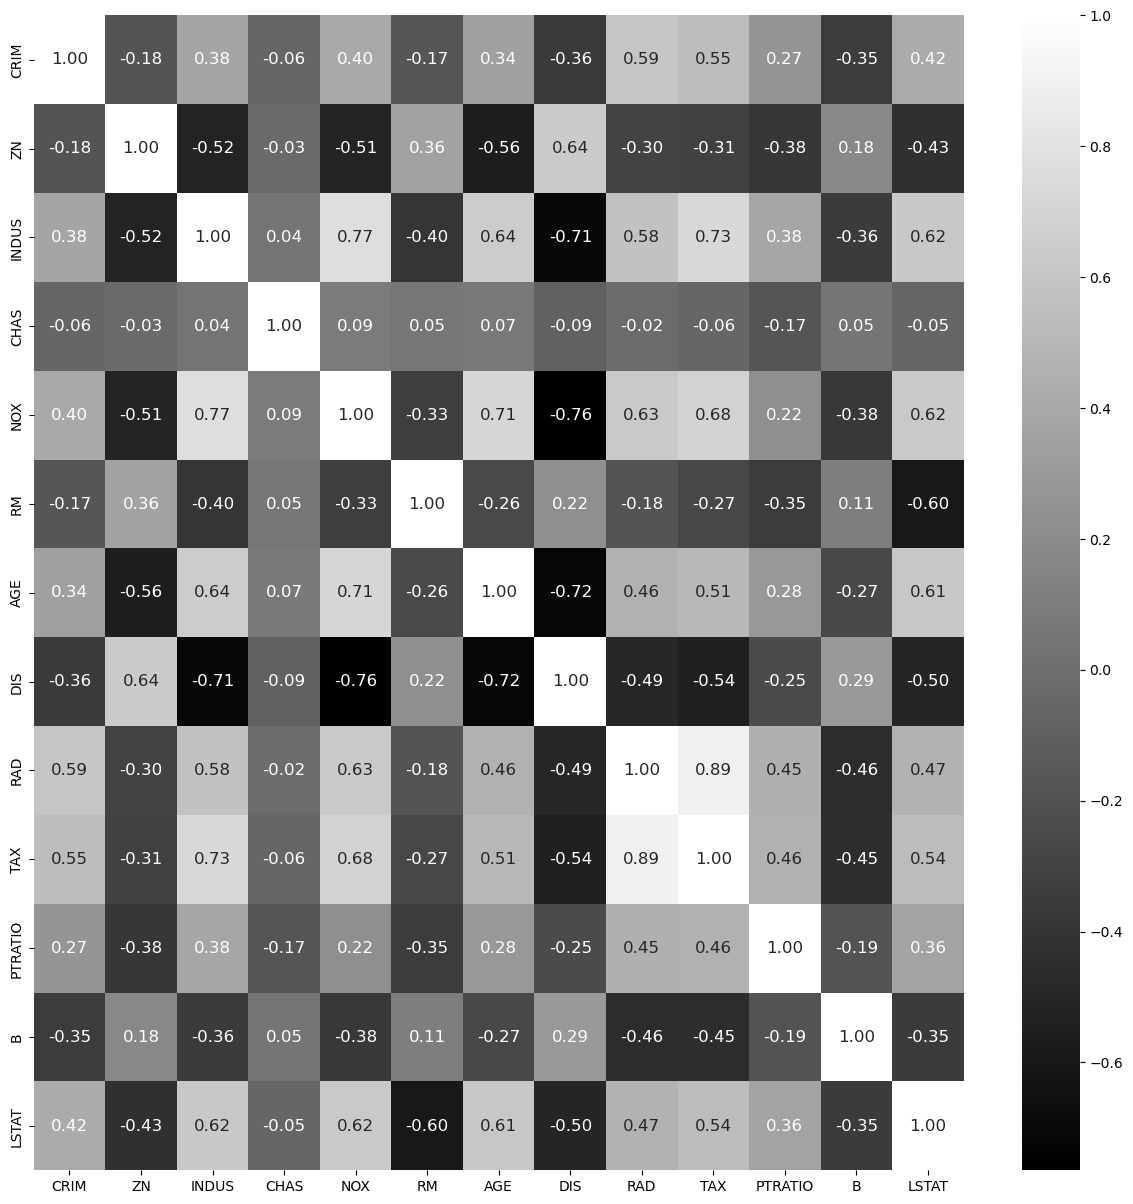

In [9]:
# 상관계수를 히트맵으로 출력

plt.figure(figsize=(15, 15))
sns.heatmap(data= X_train.corr(),
            annot= True, # 히트맵 내부에 글씨
            annot_kws={"size" : 12}, # 내부 글씨의 옵션 (글씨의 크기)
            fmt= ".2f", # 소수점 자리 출력
            cmap= "gray" # 히트멥 색상
            )

In [10]:
# 선형회귀 모델 사용
# 1. 모델 import

from sklearn.linear_model import LinearRegression

In [11]:
# 2. 모델 객체 생성

lm = LinearRegression()

In [12]:
# 3. 모델 학습

lm.fit(X_train, y_train)

LinearRegression()

In [13]:
# 4. 교차 검증

from sklearn.model_selection import cross_val_score

result = cross_val_score(lm, X_train, y_train, cv = 6)
print(result)
print(result.mean())

[0.77594119 0.7051459  0.82354719 0.52256368 0.80309716 0.49041329]
0.6867847360632918


In [14]:
# 가중치 W 확인

lm.coef_

array([-1.08934120e-01,  5.31327453e-02,  2.34402817e-02,  2.48890273e+00,
       -1.22283083e+01,  3.88090530e+00, -8.65043560e-03, -1.39279889e+00,
        2.72090186e-01, -1.11667903e-02, -9.34401294e-01,  1.05766056e-02,
       -5.59850621e-01])

In [15]:
# 편향 B값 확인

lm.intercept_

32.75619254730977

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
# 정답 예측

pre = lm.predict(X_test)

회귀 평가 지표를 이용하여 모델 평가 실행\
MSE. MAE, RMSE, R2 스코어

In [19]:
# 평가지표 import
# 

from sklearn.metrics import mean_squared_error # 평균 제곱 오차
from sklearn.metrics import mean_absolute_error # 평균 절대 오차
from sklearn.metrics import r2_score # r2 스코어

In [22]:
# MSE 사용

mean_squared_error(pre, y_test)

23.716180926283442

In [23]:
# RMSE 사용
# 사이킷런 내부에서 지원하지 않음 - 넘파이에 있는 sqrt 함수

np.sqrt(mean_squared_error(pre, y_test))

4.869926172570119

In [24]:
# MAE 사용

mean_absolute_error(pre, y_test)

3.4532926552623264

In [25]:
# r2 스코어 사용

r2_score(pre, y_test)

0.6570277457568254